In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Training data:\n",df_train.info())
print("Testing data:\n",df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Training data:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

In [4]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allum, Mr. Owen George",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Training Data Distribuion


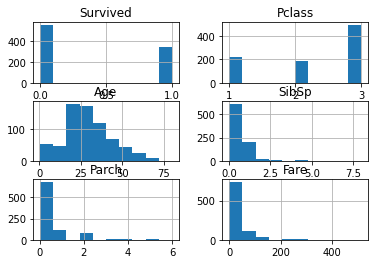

Testing Data Distribuion


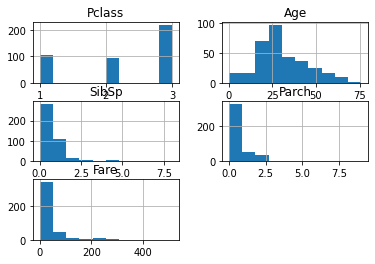

In [5]:
print("Training Data Distribuion")
df_train.iloc[:,1:].hist()
plt.show()
print("Testing Data Distribuion")
df_test.iloc[:,1:].hist()
plt.show()

It seems there are some outliers in Fare as only few people have paid very high amount of fare. So it needs to be treated.
 

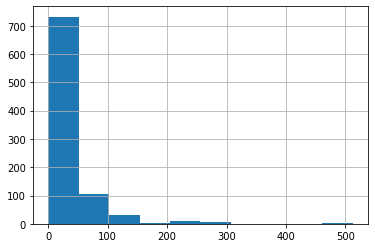

In [6]:
df_train.Fare.hist()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


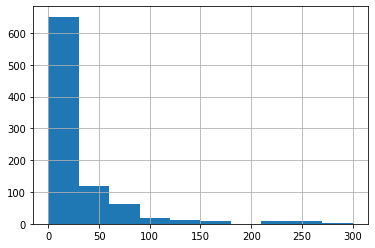

In [7]:
#Treating Outliers by repling extreme fare amount with 300
df_train.Fare[df_train.Fare>300]=300
df_test.Fare[df_test.Fare>300]=300
df_train.Fare.hist()
plt.show()

In [8]:
print(df_train.Survived.value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [9]:
df_train.groupby("Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,46.532871


It can be observed that:
* Only 38.38% of total passengers survived.
* Mean Fare of those who survied is much greater than those who died this shows that those who have paid higher fare have higher survival rate.
* 1st and 2nd Passenger class have more survival rate than 3rd


# **Exploring the Features of data:**

# **1) PassengerID**

Since PassengerID is just a unique numeric identification of each passenger It is not useful for analysis. Hence dropping It.


In [10]:
df_train.drop("PassengerId",axis=1,inplace=True)
df_test.drop("PassengerId",axis=1,inplace=True)

# **2)Pclass**

        Survived        Age     SibSp     Parch       Fare
Pclass                                                    
1       0.629630  38.233441  0.416667  0.356481  81.205671
2       0.472826  29.877630  0.402174  0.380435  20.662183
3       0.242363  25.140620  0.615071  0.393075  13.675550


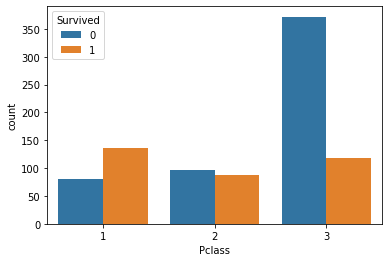

In [11]:
print(df_train.groupby("Pclass").mean())
sns.countplot(data=df_train,hue="Survived",x="Pclass")
plt.show()

It can be observed that Pclass 1 has highest Survival rate,Fare and Age followed by Pclass 2 and Pclass 3 has the least survival rate, Fare and Age.


# **3)Name**
 
Since Name includes Last name and Title it can be used to find out families with same last name and also insights about the martial status, age category and occupation can be drawn from Title. So I will break down Name in 4 parts i.e. **Last Name2 (Last_n2), Title (Title), First Name (First_n), Last Name1 (Last_n1)**.

In [12]:
#orignal names:
df_train.Name.unique()[0:4]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)'], dtype=object)

In [13]:
#Name broken in parts:
df_train.Name.str.split(" ",expand=True,)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,None,None,None,None,None,None,None,None,None,None
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
2,"Heikkinen,",Miss.,Laina,None,None,None,None,None,None,None,None,None,None,None
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
4,"Allen,",Mr.,William,Henry,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila,",Rev.,Juozas,None,None,None,None,None,None,None,None,None,None,None
887,"Graham,",Miss.,Margaret,Edith,None,None,None,None,None,None,None,None,None,None
888,"Johnston,",Miss.,Catherine,Helen,"""Carrie""",None,None,None,None,None,None,None,None,None
889,"Behr,",Mr.,Karl,Howell,None,None,None,None,None,None,None,None,None,None


In [14]:
#Only 0,1,and 3 column of name dataframe above is useful for analysis hence I will keep only those.
df_train[['Last_n2','Title','First_n','Last_n1']] = df_train.Name.str.split(" ",expand=True,).iloc[:,0:4]
df_test[['Last_n2','Title','First_n','Last_n1']] = df_test.Name.str.split(" ",expand=True,).iloc[:,0:4]
df_train.drop(["Name","First_n"],axis=1,inplace=True)
df_test.drop(["Name","First_n"],axis=1,inplace=True)
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_n2,Title,Last_n1
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,",Mr.,Harris
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs.,Bradley
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss.,None


In [15]:
#Only those Last Names and Titles are Important for analysis which has occured more than once so keeping others in a single category Prefixed by 'Other': 
Imp_Last_n2=[]
for x in df_train["Last_n2"].unique():
    if df_train.Last_n2[df_train.Last_n2==x].count()!=1:
        Imp_Last_n2.append(x)

Other_Last_n2 = [t for t in df_train["Last_n2"].unique()
                if t not in Imp_Last_n2]
df_train["Last_n2"] = df_train["Last_n2"].replace(Other_Last_n2, 'Other_Last_n2')

Other_Last_n2_test = [t for t in df_test["Last_n2"].unique()
                if t not in Imp_Last_n2]
df_test["Last_n2"] = df_test["Last_n2"].replace(Other_Last_n2_test, 'Other_Last_n2')


Imp_Title=[]
for x in df_train["Title"].unique():
    if df_train.Title[df_train.Title==x].count()!=1:
        Imp_Title.append(x)

Other_Title = [t for t in df_train["Title"].unique()
                if t not in Imp_Title]
df_train["Title"] = df_train["Title"].replace(Other_Title, 'Other_Title')

Other_Title_test = [t for t in df_test["Title"].unique()
                if t not in Imp_Title]
df_test["Title"] = df_test["Title"].replace(Other_Title_test, 'Other_Title')


Imp_Last_n1=[]
for x in df_train["Last_n1"].unique():
    if df_train.Last_n1[df_train.Last_n1==x].count()!=1:
        Imp_Last_n1.append(x)

Other_Last_n1 = [t for t in df_train["Last_n1"].unique()
                if t not in Imp_Last_n1]
df_train["Last_n1"] = df_train["Last_n1"].replace(Other_Last_n1, 'Other_Last_n1')

Other_Last_n1_test = [t for t in df_test["Last_n1"].unique()
                if t not in Imp_Last_n1]
df_test["Last_n1"] = df_test["Last_n1"].replace(Other_Last_n1_test, 'Other_Last_n1')

In [16]:
#Lets see the count and insights of each Last_n2:
df_train["Last_n2"] = df_train["Last_n2"].replace(Other_Last_n2, 'Other_Last_n2')
print("Top 3 Category Count")
print(df_train.Last_n2.value_counts()[0:3])
print("-----------------------\nMedian standard deviation for all categories:\n")
print(df_train.groupby("Last_n2").std().median())
print("-----------------------\nMean standard deviation for all categories:\n")
print(df_train.groupby("Last_n2").std().mean())
df_train.groupby("Last_n2").mean().sort_values(by='Survived', ascending=False)

Top 3 Category Count
Other_Last_n2    525
Andersson,         9
Sage,              7
Name: Last_n2, dtype: int64
-----------------------
Median standard deviation for all categories:

Survived     0.000000
Pclass       0.000000
Age         11.313708
SibSp        0.000000
Parch        0.000000
Fare         0.000000
dtype: float64
-----------------------
Mean standard deviation for all categories:

Survived     0.264251
Pclass       0.113866
Age         11.051936
SibSp        0.339944
Parch        0.285404
Fare         5.452766
dtype: float64


,Survived,Pclass,Age,SibSp,Parch,Fare
Last_n2,,,,,,
"McCoy,",1.0,3.0,NaN,2.000000,0.000000,23.2500
"Herman,",1.0,2.0,36.000000,1.000000,2.000000,65.0000
"Ryerson,",1.0,1.0,19.500000,2.000000,2.000000,262.3750
"Richards,",1.0,2.0,9.276667,1.333333,1.666667,18.7500
"Caldwell,",1.0,2.0,11.415000,0.500000,1.500000,29.0000
...,...,...,...,...,...,...
"Chapman,",0.0,2.0,44.500000,0.500000,0.000000,19.7500
"Petroff,",0.0,3.0,19.000000,0.000000,0.000000,7.8958
"Carlsson,",0.0,2.0,30.500000,0.000000,0.000000,6.3979


From the above analysis it can be observed that:
* Majority of passengers having same Last_n2 have same Survival rate, Pclass, SibSp, Parch, Fare as the median standard deviation for these variables for all Last_n2 is greater than mean standard deviation.
* It is evident that most of passengers having same last_n2 belong to same family, however it is possible that not all person belonging to same family have died or survived as the mean standard deviation of Survived is 0.26.Since median standard deviation of Survived is 0.00 it means that in majority of family either all members survived or all members died. 

Other_Last_n2    525
V_Low            151
Low               93
V_High            67
High              55
Name: Last_n2, dtype: int64
               Survived
Last_n2                
High           0.466378
Low            0.501284
Other_Last_n2  0.481010
V_High         0.000000
V_Low          0.161122


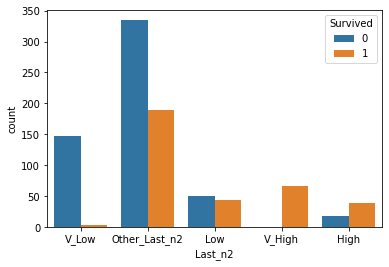

In [17]:
Last_n2_Survival=df_train[["Survived","Last_n2"]].groupby("Last_n2").mean()
Last_n2_Survival=Last_n2_Survival[Last_n2_Survival.index!="Other_Last_n2"]
V_Low=list(Last_n2_Survival[Last_n2_Survival["Survived"]<=0.25].index)
Low=list(Last_n2_Survival[(Last_n2_Survival["Survived"]>0.25) 
                                   & (Last_n2_Survival["Survived"]<=0.50)].index)
High=list(Last_n2_Survival[(Last_n2_Survival["Survived"]>0.50) 
                                   & (Last_n2_Survival["Survived"]<=0.75)].index)
V_High=list(Last_n2_Survival[Last_n2_Survival["Survived"]>0.75].index)
df_train['Last_n2']=df_train["Last_n2"].replace(V_Low,"V_Low")
df_train['Last_n2']=df_train["Last_n2"].replace(Low,"Low")
df_train['Last_n2']=df_train["Last_n2"].replace(V_High,"V_High")
df_train['Last_n2']=df_train["Last_n2"].replace(High,"High")

df_test['Last_n2']=df_test["Last_n2"].replace(V_Low,"V_Low")
df_test['Last_n2']=df_test["Last_n2"].replace(Low,"Low")
df_test['Last_n2']=df_test["Last_n2"].replace(V_High,"V_High")
df_test['Last_n2']=df_test["Last_n2"].replace(High,"High")
print(df_train.Last_n2.value_counts())
print(df_train[["Survived","Last_n2"]].groupby("Last_n2").std())
sns.countplot(data=df_train,x="Last_n2",hue="Survived")
plt.show()

In [18]:
#Lets see the count and insights of each Last_n1:
print("Top 3 Category Count")
print(df_train.Last_n1.value_counts()[0:3])
print("--------------------------\nMedian standard deviation for all categories:\n")
print(df_train.groupby("Last_n1").std().median())
print("--------------------------\nMean standard deviation for all categories:\n")
print(df_train.groupby("Last_n1").std().mean())
df_train.groupby("Last_n1").mean().sort_values(by='Survived', ascending=False)

Top 3 Category Count
Other_Last_n1    305
Henry             17
William           13
Name: Last_n1, dtype: int64
--------------------------
Median standard deviation for all categories:

Survived     0.343443
Pclass       0.516239
Age         10.076272
SibSp        0.547723
Parch        0.000000
Fare        11.742290
dtype: float64
--------------------------
Mean standard deviation for all categories:

Survived     0.296385
Pclass       0.493360
Age         11.674363
SibSp        0.755910
Parch        0.479318
Fare        25.508712
dtype: float64


,Survived,Pclass,Age,SibSp,Parch,Fare
Last_n1,,,,,,
"""Katie""",1.0,3.0,16.0,0.0,0.0,7.733300
Bertram,1.0,1.0,37.5,0.5,0.5,70.812500
W,1.0,2.0,33.5,0.0,1.0,82.297900
Thompson,1.0,1.0,43.0,0.0,0.5,94.481250
Sleeper,1.0,1.0,48.5,1.0,0.0,76.729200
...,...,...,...,...,...,...
(Maria,0.0,3.0,41.0,0.5,2.5,27.072900
Mathias,0.0,3.0,42.0,0.5,0.0,13.808350
Anderson,0.0,2.0,33.5,0.0,0.0,21.622900


From the above analysis it can be observed that mean and median standard deviation for all varibles in Last_n1 is very high as compared to Last_n2 so Last_n1 is not a much reliable variable for analysis. It may be because of multiple cases where more than 1 family have same Last_n1 and different members of same family having different Last_n1. 

In [19]:
#Dropping Last_n1:
df_train.drop("Last_n1",axis=1,inplace=True)
df_test.drop("Last_n1",axis=1,inplace=True)

In [20]:
#Lets see the count and insights of each Title:
print("Top 3 Category Count")
print(df_train.Title.value_counts()[0:3])
print("--------------------------\nMedian standard deviation for all categories:\n")
print(df_train.groupby("Title").std().median())
print("--------------------------\nMean standard deviation for all categories:\n")
print(df_train.groupby("Title").std().mean())
df_train.groupby("Title").mean().sort_values(by='Survived', ascending=False)

Top 3 Category Count
Mr.      502
Miss.    179
Mrs.     121
Name: Title, dtype: int64
--------------------------
Median standard deviation for all categories:

Survived     0.429112
Pclass       0.243975
Age          9.809963
SibSp        0.538675
Parch        0.204124
Fare        19.650107
dtype: float64
--------------------------
Mean standard deviation for all categories:

Survived     0.330929
Pclass       0.365619
Age          8.219613
SibSp        0.586129
Parch        0.333126
Fare        24.336040
dtype: float64


,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
"Gordon,",1.000000,1.000000,48.500000,1.000000,0.000000,48.264600
Mlle.,1.000000,1.000000,24.000000,0.000000,0.000000,59.402100
Mrs.,0.801653,1.983471,36.182692,0.685950,0.851240,45.238567
y,0.750000,1.500000,20.666667,0.750000,0.000000,61.380200
Miss.,0.703911,2.301676,21.846154,0.709497,0.547486,43.032823
Master.,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Col.,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000
Major.,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000
Dr.,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457


From the above analysis it can be observed that Title has low mean and median standard deviation for Age and also every Title have significant difference in average Age so it can act as a good predictor for imputing missing values of Age.


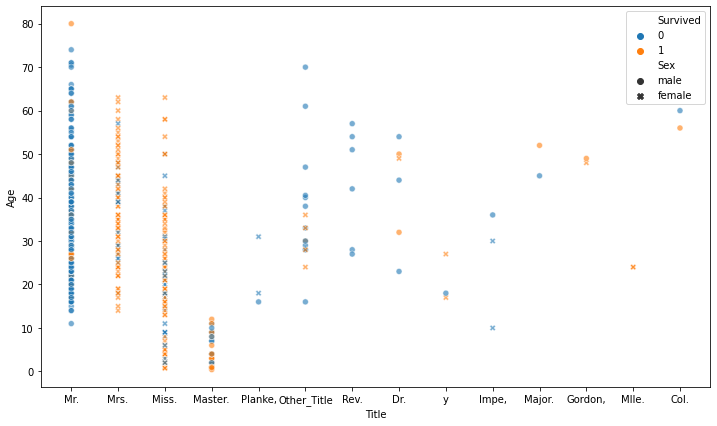

In [21]:
plt.figure(figsize=[12,7])
sns.scatterplot(data=df_train,hue="Survived",y="Age",x="Title",style="Sex",alpha=0.6)
plt.show()

# **4)Sex**

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,43.803610
male,0.188908,2.389948,30.726645,0.429809,0.235702,24.787917


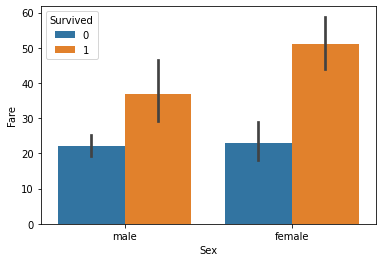

In [22]:
sns.barplot(data=df_train,x="Sex",y="Fare",hue="Survived")
df_train.groupby("Sex").mean()

It can be observed that females have much higher survival rate than males and on an average they had paid much higher Fare as compared to males.  

# **5)Age**
It is the age of individual passenger. This column has many missing values in both training and testing data.


null values in Age =  177


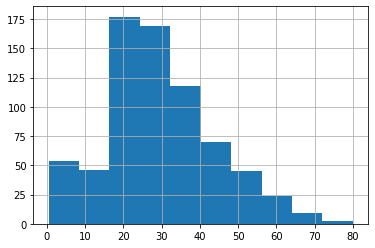

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


null values after imputing Age with mean of age for that Title =  0


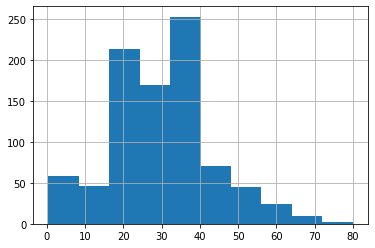

In [23]:
print("null values in Age = ", df_train.Age.isnull().sum())

df_train.Age.hist()
plt.show()
for x in df_train.Title.unique():
    df_train["Age"][df_train["Title"]==x]=df_train["Age"][df_train["Title"]==x].replace(np.nan,df_train["Age"][df_train["Title"]==x].mean())
df_train.Age.hist()
print("null values after imputing Age with mean of age for that Title = ", df_train.Age.isnull().sum())
plt.show()


null values in Age in Test data =  86


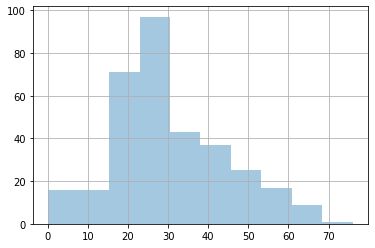

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


null values after imputing Age with mean of age for that Title =  0


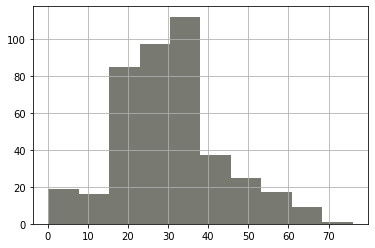

In [24]:
#making changes in Testing data:
print("null values in Age in Test data = ", df_test.Age.isnull().sum())

df_test.Age.hist(alpha=0.4)

plt.show()

for x in df_test.Title.unique():
    df_test["Age"][df_test["Title"]==x]=df_test["Age"][df_test["Title"]==x].replace(np.nan,df_train["Age"][df_train["Title"]==x].mean())
df_test.Age.hist()
print("null values after imputing Age with mean of age for that Title = ", df_test.Age.isnull().sum())

df_test.Age.hist(alpha=0.4)
plt.show()


It can be observed that there are significant changes in Age distribution in both Training and testing data after imputing the missing values of Age.

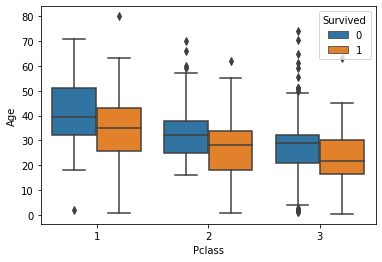

In [25]:
sns.boxplot(data=df_train, x="Pclass",y="Age",hue="Survived")


It can be observed that lower age passengers had more survival rate for every Pclass. Also Passengers belonging to Pclass 1 had the highest age followed by Pclass 2 and Pclass 3 in respective order.

# **6)SibSp**
It denotes the total number of Siblings and Spouse travelling together.

In [26]:
df_train.groupby("SibSp").mean().sort_values(by='Survived', ascending=False)

,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
1,0.535885,2.057416,29.988464,0.655502,44.147370
2,0.464286,2.357143,23.290192,0.642857,51.753718
0,0.345395,2.351974,31.268334,0.185855,24.644351
3,0.250000,2.562500,14.819539,1.312500,68.908862
4,0.166667,3.000000,7.055556,1.500000,31.855556
5,0.000000,3.000000,10.200000,2.000000,46.900000
8,0.000000,3.000000,23.897351,2.000000,69.550000


It can be observed that passengers with higher number of siblings and spouse have lower survival rate and higher fare and vice versa. Though this relationship is not linear.

# **7)Parch**
It is the number of parents and childrens traveling together. 

In [27]:
df_train.groupby("Parch").mean().sort_values(by='Survived', ascending=False)

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
3,0.600000,2.600000,33.200000,1.000000,25.951660
1,0.550847,2.203390,23.929744,1.084746,44.978780
2,0.500000,2.275000,18.580985,2.062500,64.337604
0,0.343658,2.321534,31.888005,0.237463,24.960434
5,0.200000,3.000000,39.200000,0.600000,32.550000
4,0.000000,2.500000,44.500000,0.750000,84.968750
6,0.000000,3.000000,43.000000,1.000000,46.900000


We can observe that lower number of parents and children traveling together have paid higher fare and vice versa.

**Family Size (f_size)**

Adding SibSp and Parch would give total family size. So creating a new variable f_size which denotes total family size.

In [28]:
df_train["f_size"]=df_train.Parch+df_train.SibSp
df_test["f_size"]=df_test.Parch+df_test.SibSp
df_train.groupby("f_size").mean().sort_values(by='Survived', ascending=False)

,Survived,Pclass,Age,SibSp,Parch,Fare
f_size,,,,,,
3,0.724138,2.068966,18.884682,1.344828,1.655172,54.864510
2,0.578431,2.225490,25.815308,0.872549,1.127451,39.692482
1,0.552795,1.919255,31.525103,0.763975,0.236025,48.575314
6,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667
0,0.303538,2.400372,31.861272,0.000000,0.000000,20.451891
4,0.200000,2.666667,19.940842,2.133333,1.866667,58.094453
5,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727
7,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000
10,0.000000,3.000000,23.897351,8.000000,2.000000,69.550000


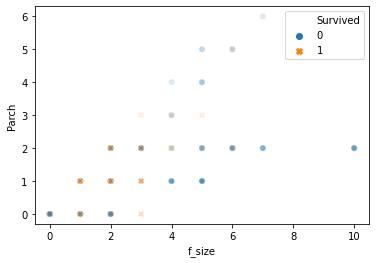

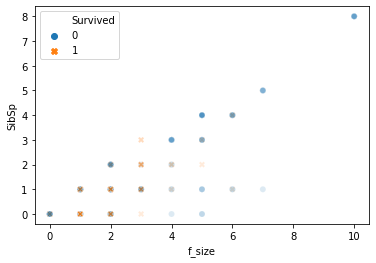

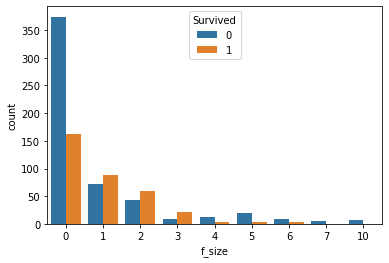

In [29]:
sns.scatterplot(data=df_train,y="Parch",hue="Survived",x="f_size",style="Survived",alpha=0.15)
plt.show()
sns.scatterplot(data=df_train,y="SibSp",hue="Survived",x="f_size",style="Survived",alpha=0.15)
plt.show()
sns.countplot(data=df_train,hue="Survived",x="f_size")
plt.show()

It can be observed from the above analysis that lower family size have a higher survival rate and lower fare.

# **8)Ticket**
As there are very few similar tickets It would not be much useful so I am dropping it.

In [30]:
df_train.drop("Ticket",axis=1,inplace=True)
df_test.drop("Ticket",axis=1,inplace=True)
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Last_n2,Title,f_size
0,0,3,male,22.0,1,0,7.2500,NaN,S,V_Low,Mr.,1
1,1,1,female,38.0,1,0,71.2833,C85,C,Other_Last_n2,Mrs.,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,Other_Last_n2,Miss.,0


# **9)Fare**
It is the amount paid by passenger for ticket.


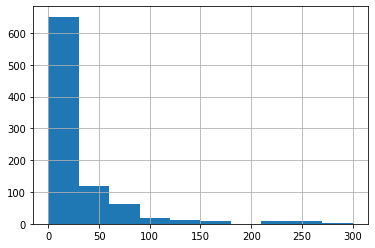

In [31]:
df_train.Fare.hist()

Most of passengers paid fare ranging from 0 to 50.

<Figure size 504x1080 with 0 Axes>

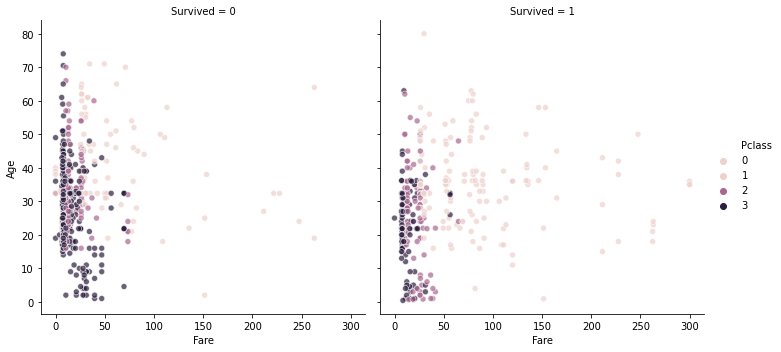

In [32]:
plt.figure(figsize=[7,15])
sns.relplot(data=df_train, x="Fare",y="Age",hue="Pclass",
            col="Survived",kind="scatter",alpha=0.7)
plt.show()

It can be observed that Amount Fare paid has strong relationship with Pclass.

In [33]:
#there is one null fare value in test data so treating it with average fare value of that Pclass:
print("null values in Fare in Test data = ", df_test.Fare.isnull().sum())
for x in df_test.Pclass.unique():
    df_test["Fare"][df_test["Pclass"]==x]=df_test["Fare"][df_test["Pclass"]==x].replace(np.nan,df_train["Fare"][df_train["Pclass"]==x].mean())
print("null values in Fare in Test data after imputing null values = ", df_test.Fare.isnull().sum())

null values in Fare in Test data =  1
null values in Fare in Test data after imputing null values =  0


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sy

# **10)Cabin**
The Cabin first letter indicates deck it may influence survival as different cabin are located at different place on the ship.

In [34]:
#Actual Cabin Values.
print(df_train.Cabin.unique())
print("Total unique Values: ",df_train.Cabin.nunique())
print("Null values: ",df_train.Cabin.isnull().sum())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Total unique Values:  147
Null values:  687

In [35]:
#Grouping missing data of Cabin by naming it as O:
df_train.Cabin.replace(np.nan,"O",inplace=True)
df_test.Cabin.replace(np.nan,"O",inplace=True)
df_train.Cabin=df_train.Cabin.str[0]
df_test.Cabin=df_test.Cabin.str[0]
print("Total unique Values: ",df_train.Cabin.nunique())
print("Total Count of each Cabin type: ",df_train.Cabin.value_counts())
print("Null values: ",df_train.Cabin.isnull().sum())

Total unique Values:  9
Total Count of each Cabin type:  O    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
Null values:  0


In [83]:
print("Mean standard deviaion of each category by cabin:\n",df_train.groupby("Cabin").std().mean())
df_train.groupby("Cabin").mean().sort_values(by='Survived', ascending=False)

KeyError: 'Cabin'

* Cabin has low mean standard deviation for Pclass this means that many cabin had only one class of passengers.
* Each cabin has much different survival rate.

# **11)Embarked**
It denotes the place of boarding the ship.

In [37]:
#Imputing missing value in Embarked with mode
E_m=df_train.Embarked.mode()
print("null values in training data before imputing Embarked = ", df_train.Embarked.isnull().sum())
df_train["Embarked"].replace(np.nan,E_m[0],inplace=True)
print("null values in training data after imputing with mode of Embarked = ", df_train.Embarked.isnull().sum())
print("null values in testing data before imputing Embarked = ", df_test.Embarked.isnull().sum())
df_test["Embarked"].replace(np.nan,E_m[0],inplace=True)
print("null values in testing data after imputing with mode of Embarked = ", df_test.Embarked.isnull().sum())

null values in training data before imputing Embarked =  2
null values in training data after imputing with mode of Embarked =  0
null values in testing data before imputing Embarked =  0
null values in testing data after imputing with mode of Embarked =  0


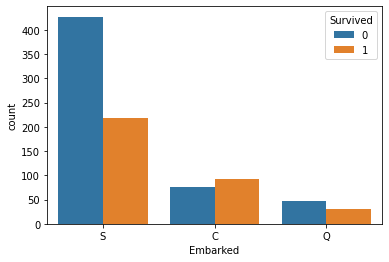

In [38]:
sns.countplot( data=df_train, hue="Survived",x="Embarked")

In [39]:
df_train.groupby("Embarked").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,f_size
Embarked,,,,,,,
C,0.553571,1.886905,30.842197,0.386905,0.363095,56.162551,0.750000
Q,0.389610,2.909091,27.725773,0.428571,0.168831,13.276030,0.597403
S,0.339009,2.346749,29.716536,0.569659,0.411765,27.243651,0.981424


It can be observed that each Emabrked had different survival rates,average Fare and Pclass.

# **Checking missing values and final variable names in data**

In [40]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Last_n2     0
Title       0
f_size      0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Last_n2     0
Title       0
f_size      0
dtype: int64


There are no missing values left.

In [41]:

df_train.Last_n2

0              V_Low
1      Other_Last_n2
2      Other_Last_n2
3                Low
4                Low
           ...      
886    Other_Last_n2
887             High
888            V_Low
889    Other_Last_n2
890    Other_Last_n2
Name: Last_n2, Length: 891, dtype: object

In [42]:
le = LabelEncoder()
df_train["Sex"] = le.fit_transform(df_train["Sex"]) 
df_test["Sex"] = le.transform(df_test["Sex"]) 
#df_train["Last_n2"] = le.fit_transform(df_train["Last_n2"])
#df_test["Last_n2"] = le.transform(df_test["Last_n2"])
df_train = pd.get_dummies(columns = ["Title","Embarked","Cabin","Last_n2"], data = df_train)
df_test = pd.get_dummies(columns = ["Title","Embarked","Cabin","Last_n2"], data = df_test)


In [43]:
df_train.drop("Last_n2_Other_Last_n2",axis=1,inplace=True)
df_test.drop("Last_n2_Other_Last_n2",axis=1,inplace=True)
Features=list(df_train.columns)[1:]
Features

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'f_size',
 'Title_Col.',
 'Title_Dr.',
 'Title_Gordon,',
 'Title_Impe,',
 'Title_Major.',
 'Title_Master.',
 'Title_Miss.',
 'Title_Mlle.',
 'Title_Mr.',
 'Title_Mrs.',
 'Title_Other_Title',
 'Title_Planke,',
 'Title_Rev.',
 'Title_y',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_O',
 'Cabin_T',
 'Last_n2_High',
 'Last_n2_Low',
 'Last_n2_V_High',
 'Last_n2_V_Low']

In [44]:
X = df_train.drop(['Survived'], axis = 1)
y = df_train.Survived

In [45]:
LR=GridSearchCV(estimator=LogisticRegression(),cv=10,n_jobs=-1,scoring='accuracy',param_grid=[{'C':[0.5,1,1.5,2,2.5,3,4,5,7,10,15],'penalty':['l2'],'max_iter':[1000]}])

In [46]:
LR.fit(X,y)#.drop("Last_n2",axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 7, 10, 15],
                          'max_iter': [1000], 'penalty': ['l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [47]:
LR.best_score_,LR.best_params_

(0.8787878787878788, {'C': 3, 'max_iter': 1000, 'penalty': 'l2'})

In [91]:
SVM_Linear=GridSearchCV(estimator=LinearSVC( max_iter= 4000),cv=10,n_jobs=-1,scoring='accuracy',param_grid=[{'C':[0.5,1,1.5,2,2.5,3,4,5,7,10,15],'penalty':['l2']}])
SVM_Linear_PL = make_pipeline(StandardScaler(),SVM_Linear)

In [92]:
SVM_Linear_PL.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=10, error_score='raise-deprecating',
                              estimator=LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=4000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                  verbose=0),
                              iid='warn', n_jobs=-1,
                              param_grid=[{'C': [0.5, 1, 1.5, 2, 2.5, 

In [93]:
SVM_Linear.best_score_,SVM_Linear.best_params_

(0.8742985409652076, {'C': 0.5, 'penalty': 'l2'})

In [94]:
print(classification_report(y,SVM_Linear_PL.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       549
           1       0.87      0.80      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891



In [56]:
pd.DataFrame(SVM_Linear.cv_results_)[pd.DataFrame(SVM_Linear.cv_results_)['rank_test_score']<10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.474547,0.093219,0.000100,0.000299,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.876404,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.873176,0.022585,7
1,0.609413,0.135820,0.000000,0.000000,1,l2,"{'C': 1, 'penalty': 'l2'}",0.888889,0.900000,0.831461,0.876404,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.874299,0.023591,3
2,0.483492,0.118525,0.001686,0.004659,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.876404,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.873176,0.022585,7
3,0.515425,0.133140,0.001662,0.004663,2,l2,"{'C': 2, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.876404,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.873176,0.022585,7
4,0.521859,0.084455,0.000000,0.000000,2.5,l2,"{'C': 2.5, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.876404,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.873176,0.022585,7
5,0.527187,0.075809,0.001562,0.004686,3,l2,"{'C': 3, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.887640,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.874299,0.022993,3
6,0.536072,0.091105,0.000100,0.000299,4,l2,"{'C': 4, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.887640,0.898876,0.842697,0.865169,0.865169,0.898876,0.886364,0.875421,0.022233,1
7,0.543101,0.140612,0.001716,0.004490,5,l2,"{'C': 5, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.898876,0.898876,0.842697,0.853933,0.853933,0.898876,0.886364,0.874299,0.024583,3
8,0.534301,0.108742,0.000221,0.000663,7,l2,"{'C': 7, 'penalty': 'l2'}",0.888889,0.888889,0.831461,0.876404,0.898876,0.842697,0.865169,0.842697,0.921348,0.886364,0.874299,0.027026,3
9,0.520377,0.084757,0.000222,0.000666,10,l2,"{'C': 10, 'penalty': 'l2'}",0.888889,0.900000,0.831461,0.887640,0.898876,0.842697,0.853933,0.853933,0.910112,0.886364,0.875421,0.025952,1


In [57]:
RF=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),cv=5,n_jobs=-1,scoring='accuracy',param_grid=[{'criterion':['gini','entropy'],'max_depth':range(2,100),'n_estimators':[20,30,60,100]}])

In [58]:
RF.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [59]:
RF.best_score_,RF.best_params_

(0.877665544332211,
 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 20})

In [60]:
pd.DataFrame(RF.cv_results_)[pd.DataFrame(RF.cv_results_)['rank_test_score']<10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.323657,0.018310,0.119566,0.010937,gini,7,60,"{'criterion': 'gini', 'max_depth': 7, 'n_estim...",0.888268,0.854749,0.876404,0.859551,0.892655,0.874299,0.015075,6
23,0.531610,0.037926,0.117418,0.007045,gini,7,100,"{'criterion': 'gini', 'max_depth': 7, 'n_estim...",0.893855,0.860335,0.876404,0.848315,0.898305,0.875421,0.019105,3
24,0.176433,0.013677,0.124478,0.011465,gini,8,20,"{'criterion': 'gini', 'max_depth': 8, 'n_estim...",0.888268,0.854749,0.876404,0.859551,0.892655,0.874299,0.015075,6
40,0.172649,0.031352,0.130639,0.006545,gini,12,20,"{'criterion': 'gini', 'max_depth': 12, 'n_esti...",0.888268,0.849162,0.887640,0.859551,0.892655,0.875421,0.017631,3
408,0.160659,0.011282,0.118482,0.010700,entropy,6,20,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.888268,0.860335,0.876404,0.865169,0.898305,0.877666,0.014109,1
409,0.178355,0.048285,0.118897,0.006421,entropy,6,30,"{'criterion': 'entropy', 'max_depth': 6, 'n_es...",0.899441,0.860335,0.876404,0.848315,0.887006,0.874299,0.018276,6
415,0.568676,0.032833,0.110183,0.001366,entropy,7,100,"{'criterion': 'entropy', 'max_depth': 7, 'n_es...",0.888268,0.860335,0.870787,0.853933,0.898305,0.874299,0.016679,6
417,0.174251,0.025316,0.121279,0.018222,entropy,8,30,"{'criterion': 'entropy', 'max_depth': 8, 'n_es...",0.899441,0.849162,0.876404,0.859551,0.887006,0.874299,0.018176,6
418,0.347289,0.019233,0.120019,0.008697,entropy,8,60,"{'criterion': 'entropy', 'max_depth': 8, 'n_es...",0.888268,0.865922,0.876404,0.853933,0.892655,0.875421,0.014238,3
419,0.550212,0.034627,0.114596,0.000766,entropy,8,100,"{'criterion': 'entropy', 'max_depth': 8, 'n_es...",0.888268,0.865922,0.876404,0.859551,0.898305,0.877666,0.014170,1


In [61]:
RF.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 20}

In [62]:
print(tree.export_text(RF.best_estimator_.estimators_[10],feature_names=Features))

|--- Title_Mrs. <= 0.50
|   |--- Title_Miss. <= 0.50
|   |   |--- Cabin_O <= 0.50
|   |   |   |--- Last_n2_Low <= 0.50
|   |   |   |   |--- Title_Mr. <= 0.50
|   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Age >  39.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Title_Mr. >  0.50
|   |   |   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Embarked_S >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- Last_n2_Low >  0.50
|   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Sex >  0.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |--- Cabin_O >  0.50
|   |   |   |--- Title_Master. <= 0.50
|   |   |   |   |--- Last_n2_V_High <= 0.50
|   |   |   |   |   |--- Fare <= 51.80
|   |   |   |   |   |   |--- clas

In [63]:
DT=GridSearchCV(estimator=DecisionTreeClassifier(),cv=10,n_jobs=-1,scoring='accuracy',param_grid=[{'criterion':['gini','entropy'],'max_depth':range(2,100)}])

In [64]:
DT.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 100)}],
             pre_disp

In [65]:
DT.best_score_,DT.best_params_

(0.8653198653198653, {'criterion': 'gini', 'max_depth': 2})

In [66]:
print(tree.export_text(DT.best_estimator_,feature_names=Features))

|--- Sex <= 0.50
|   |--- Last_n2_V_Low <= 0.50
|   |   |--- class: 1
|   |--- Last_n2_V_Low >  0.50
|   |   |--- class: 0
|--- Sex >  0.50
|   |--- Last_n2_V_High <= 0.50
|   |   |--- class: 0
|   |--- Last_n2_V_High >  0.50
|   |   |--- class: 1



In [67]:
jvjvjvj

NameError: name 'jvjvjvj' is not defined

In [95]:
classifiers = [
    ('Logistic Regression', LogisticRegression(C= 3, max_iter= 1000, penalty='l2')),
    ('Random forest', RandomForestClassifier(n_jobs=-1,criterion='entropy',max_depth= 6, n_estimators= 20)),
    #('Decision Tree',DecisionTreeClassifier(criterion='gini',max_depth= 2)), 
    ('Linear_SVM', make_pipeline(StandardScaler(),LinearSVC(C=0.5,penalty='l2', max_iter= 4000)))]
V_Clf = GridSearchCV(estimator=VotingClassifier(classifiers),cv=10,n_jobs=-1,scoring='accuracy',param_grid=[{'voting':['hard']}])

In [96]:
V_Clf.fit(X,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=VotingClassifier(estimators=[('Logistic Regression',
                                                     LogisticRegression(C=3,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=1000,
                                                                        multi_class='warn',
                                                                        n_jobs=None,
                                                                        penalty='l2

In [97]:
V_Clf.best_score_,V_Clf.best_params_

(0.8754208754208754, {'voting': 'hard'})

In [98]:
pd.DataFrame(V_Clf.cv_results_)
#entropyt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_voting,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.81362,0.17023,0.187277,0.101318,hard,{'voting': 'hard'},0.888889,0.9,0.831461,0.88764,0.898876,0.842697,0.865169,0.853933,0.898876,0.886364,0.875421,0.023929,1


In [100]:
print(classification_report(y,V_Clf.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       549
           1       0.87      0.80      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.87      0.87       891
weighted avg       0.88      0.88      0.88       891



In [101]:
print(classification_report(y,SVM_Linear_PL.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       549
           1       0.87      0.80      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891



In [104]:
print(classification_report(y,RF.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       549
           1       0.90      0.79      0.84       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



In [105]:
print(classification_report(y,LR.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       549
           1       0.87      0.82      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.87      0.88       891
weighted avg       0.88      0.88      0.88       891



In [99]:
print(classification_report(y,V_Clf.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       549
           1       0.87      0.80      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.87      0.87       891
weighted avg       0.88      0.88      0.88       891



In [81]:
V_Clf.score(X,y)

0.8821548821548821

In [ ]:

#Last_n2_Survival[Last_n2_Survival["Survived"]>0.75]="High Sur. Rate of L_n2"
print(np.corrcoef((df_train.Parch), y))
np.corrcoef((df_train.SibSp), y)

In [ ]:
np.corrcoef((df_train.SibSp-df_train.Parch), y)

In [ ]:
sns.scatterplot(data=df_train,hue="Survived",style='Sex',x=np.sqrt((df_train.SibSp-df_train.Parch)**2),y='f_size',alpha=0.2)

In [ ]:
sns.scatterplot(data=df_test,hue="Sex",x=(df_test.SibSp-df_test.Parch),y="f_size",alpha=0.3)

In [ ]:
sns.scatterplot(data=df_train,hue="Sex",x=(df_train.SibSp-df_train.Parch),y="f_size",alpha=0.3)

In [ ]:
print(classification_report(y,V_Clf.predict(X)))


In [ ]:
SVC_Linear_PL.

In [ ]:
gkgkg

In [109]:
columns_not_in_test = set( X.columns ) - set( df_test.columns )
columns_not_in_test

{'Cabin_T', 'Title_Gordon,', 'Title_Impe,', 'Title_Major.', 'Title_Mlle.'}

In [110]:
for i in columns_not_in_test:
    df_test[i] = 0
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'f_size',
       'Title_Col.', 'Title_Dr.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Other_Title', 'Title_Planke,', 'Title_Rev.',
       'Title_y', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_O', 'Last_n2_High', 'Last_n2_Low', 'Last_n2_V_High',
       'Last_n2_V_Low', 'Title_Mlle.', 'Title_Major.', 'Title_Impe,',
       'Title_Gordon,', 'Cabin_T'],
      dtype='object')

In [111]:
len(df_test.columns),len(X.columns)

(37, 37)

In [112]:
df_test = df_test[X.columns]

In [106]:
v_clf=VotingClassifier(classifiers,n_jobs=-1,voting='hard')

In [107]:
v_clf.fit(X,y)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=3, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Random forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weig...
                                       steps=[('standardscaler',
                           

In [108]:
v_clf.score(X,y)

0.8832772166105499

In [121]:
print(classification_report(y,v_clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       549
           1       0.87      0.81      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.87      0.87       891
weighted avg       0.88      0.88      0.88       891



In [114]:
Test_pred4=v_clf.predict(df_test)
Test_pred4

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [115]:
Passengerid=pd.read_csv("test.csv")["PassengerId"]
my_submission4a = pd.DataFrame({'PassengerId': Passengerid, 'Survived': Test_pred4})
my_submission4a.to_csv('submission4a.csv', index=False)

In [ ]:
sns.boxplot(data=df_train,hue="Survived",y=df_train.SibSp-df_train.Parch,x="Sex")

In [ ]:
sns.boxplot(data=df_train,x="Survived",y=(df_train.SibSp-df_train.Parch),hue="f_size")

In [ ]:
sns.countplot(data=df_train,x="Survived",hue=df_train.SibSp-df_train.Parch)

In [ ]:
sns.countplot(data=df_train,hue="Survived",x=(df_train.SibSp-df_train.Parch)+df_train.f_size)

In [ ]:
sns.countplot(data=df_train,x="Survived",hue=df_train.SibSp-df_train.Parch)

In [ ]:
df_train.groupby("f_size").std().sort_values(by='Survived', ascending=False)

In [ ]:
df_train.groupby("Parch").std().sort_values(by='Survived', ascending=False)

In [ ]:
df_train.groupby(df_train.SibSp-df_train.Parch).std().sort_values(by='Survived', ascending=False)

In [116]:
Test_pred3b=RF.predict(df_test)
Test_pred3b

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Passengerid=pd.read_csv("test.csv")["PassengerId"]
my_submission3b = pd.DataFrame({'PassengerId': Passengerid, 'Survived': Test_pred3b})
my_submission3b.to_csv('submission3b.csv', index=False)

In [117]:
print(classification_report(y,RF.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       549
           1       0.90      0.79      0.84       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



In [118]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 6, n_estimators= 20,n_jobs=-1)

In [119]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [120]:
print(classification_report(y,rf.predict(X)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       549
           1       0.89      0.80      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.87      0.88       891
weighted avg       0.88      0.88      0.88       891



In [123]:
Test_pred4c=rf.predict(df_test)
Test_pred4c

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [126]:
Test_pred4c-Test_pred4

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [127]:
Passengerid=pd.read_csv("test.csv")["PassengerId"]
my_submission4c = pd.DataFrame({'PassengerId': Passengerid, 'Survived': Test_pred4c})
my_submission4c.to_csv('submission4c.csv', index=False)